# 3. Scikit Learn Examples - Surrogate Local Models

For our experiments we will use again "Breast Cancer" datase

In [1]:
from sklearn import datasets,model_selection
breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
y = breastCancer.target
target_names = breastCancer.target_names
feature_names = breastCancer.feature_names
#Exactly, the same data for train and test set!
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=0)

In [2]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Random Forests Performance:")
print(classification_report(y_test,y_pred,target_names=target_names))

Random Forests Performance:
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Creating the new oracle dataset

In [3]:
new_x_train = x_train
new_y_train = classifier.predict(x_train)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
knnmodel = KNeighborsClassifier(n_neighbors=50, weights="distance", metric="minkowski", p=2)
knnmodel = knnmodel.fit(new_x_train, new_y_train)
print("Finding Neighbors of Instance...")
test_x = [x_test[0]]
ys = knnmodel.kneighbors(test_x, n_neighbors=50, return_distance=False) #Try for 100!
new_x_train2 = []
new_y_train2 = []
for i in ys[0]:
    new_x_train2.append(new_x_train[i])
    new_y_train2.append(new_y_train[i])

Finding Neighbors of Instance...


In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive
from graphviz import Source


print("Decision Tree Explanator")
def plot_tree(depth=1):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    print("Creating Decision Tree for the Instance:")
    estimator.fit(new_x_train2, new_y_train2)
    print("Decision Tree Predicts and explains for Instance:" + str(estimator.predict(test_x)) + " and Random Forests predicted:" + str(classifier.predict(test_x)))
    fidelityPreds = estimator.predict(new_x_train2)
    print("Let's see fidelity",classification_report(fidelityPreds,new_y_train2))

    accuracyPreds = dtmodel.predict(x_test)
    print("Let's see Accuracy",classification_report(accuracyPreds,y_test))
    
    graph = Source(export_graphviz(dtmodel
      , out_file=None
      , feature_names=feature_names
      , class_names=target_names
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    print("Lets find out the path for this specific instance!")
    print("So our instance, passes through nodes 0, 6 and 8. We give those ids with a Preorder Tree Traversal. ")
    for i in estimator.decision_path(test_x):
        print(i)
    return estimator
inter=interactive(plot_tree 
   , depth=(1,5))
display(inter)

Decision Tree Explanator


interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

There are plenty of ways on finding or creating neighborhoods. For example via clustering.

## Let's try it with a Logistic regression model

In [22]:
from sklearn.linear_model import LogisticRegression
print("Creating Decision Tree for the Instance:")
lrmodel = LogisticRegression(solver='newton-cg',max_iter=1000,C=10000,random_state=0)
lrmodel.fit(new_x_train2, new_y_train2)
print("Logistic Regression Predicts and explains for Instance:" + str(lrmodel.predict(test_x)) + " and Random Forests predicted:" + str(classifier.predict(test_x)))
fidelityPreds = lrmodel.predict(new_x_train2)
print("Let's see fidelity",classification_report(fidelityPreds,new_y_train2))

accuracyPreds = lrmodel.predict(x_test)
print("Let's see Accuracy",classification_report(accuracyPreds,y_test))

Creating Decision Tree for the Instance:
Logistic Regression Predicts and explains for Instance:[0] and Random Forests predicted:[0]
Let's see fidelity               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Let's see Accuracy               precision    recall  f1-score   support

           0       0.67      0.86      0.75        49
           1       0.94      0.83      0.88       122

   micro avg       0.84      0.84      0.84       171
   macro avg       0.80      0.84      0.81       171
weighted avg       0.86      0.84      0.84       171



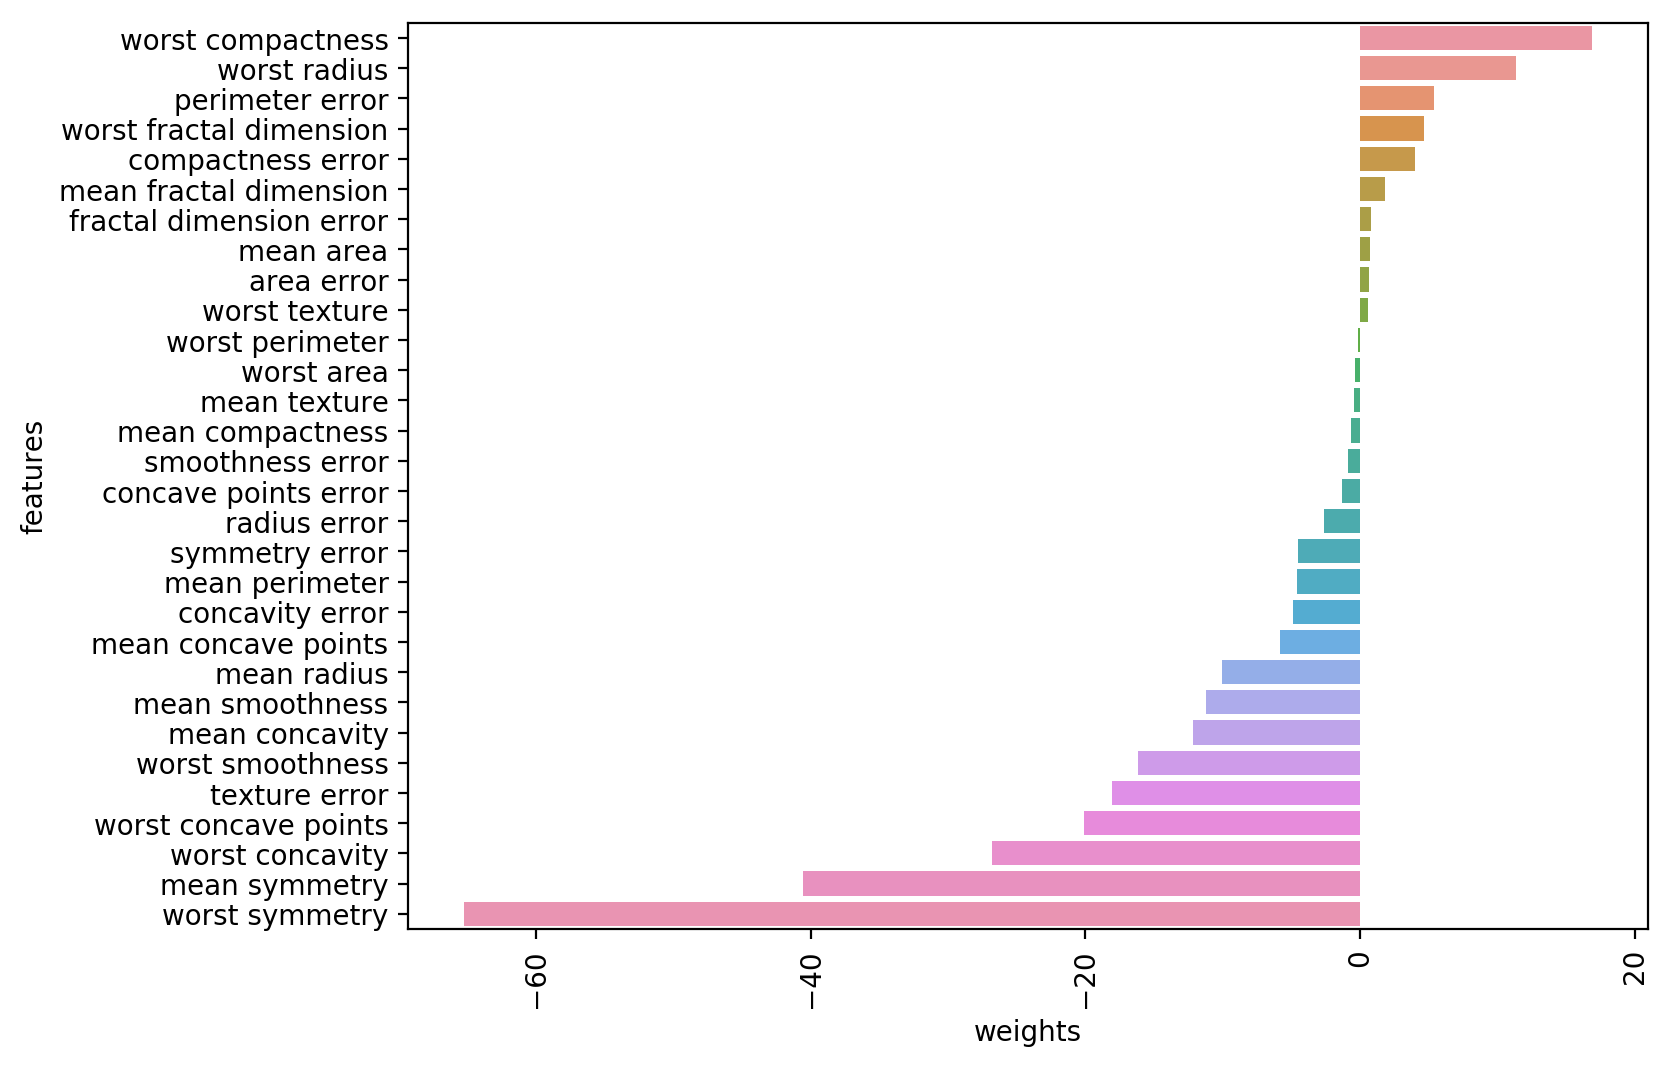

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weights = lrmodel.coef_
model_weights = pd.DataFrame({ 'features': list(feature_names),'weights': list(weights[0])})
model_weights = model_weights.sort_values(by='weights', ascending=False)
plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.xticks(rotation=90)
plt.show()